<a href="https://colab.research.google.com/github/bharadwajkastur1/Intrusion-Detection-System/blob/main/IntrusionDetectionSystem-workingFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
#IMPORTS
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings

In [181]:
#LOADING THE DATASET
train_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Intrusion-Detection-System/main/Train_data.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/bharadwajkastur1/Intrusion-Detection-System/main/Test_data.csv')

In [182]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Considering only the train data for EDA and training.

In [183]:
#ROW AND COLUMN DIMENSIONS 
print("Row size = {}, Column size = {}".format(train_df.shape[0],train_df.shape[1]))

Row size = 25192, Column size = 42


In [184]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_df.drop("class", axis=1), train_df['class'], test_size=0.3)

In [185]:
#CHECKING FOR MISSING VALUES
x_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [186]:
#DESCRIPTIVE STATISTICS 
x_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,17634.000000,1.763400e+04,1.763400e+04,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,...,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000
mean,309.735341,1.049310e+04,3.057774e+03,0.000113,0.023080,0.000057,0.205739,0.001134,0.395373,0.299819,...,182.306056,115.089883,0.518815,0.082710,0.146884,0.031944,0.286787,0.281047,0.117205,0.118094
std,2691.719361,1.838696e+05,7.140424e+04,0.010649,0.256444,0.007531,2.224098,0.043897,0.488944,12.354661,...,99.063036,110.775276,0.449079,0.187862,0.307142,0.111424,0.445850,0.446466,0.305215,0.316848
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.460000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,7.665876e+06,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Insights Drawn:


*   There are a few binary ( not useful) and redundant features
*   A few features are categorical and need to ne encoded into numerical value types
* Some features are to be normalized due to the the high scale difference



In [187]:
#COLUMNS WHICH ARE NOT USEFUL
print(x_train['is_host_login'].value_counts())
print(x_train['num_outbound_cmds'].value_counts())

0    17634
Name: is_host_login, dtype: int64
0    17634
Name: num_outbound_cmds, dtype: int64


In [188]:
#DROPPING COLUMNS WHICH AREN'T USEFUL FOR TRAINING
x_train.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
x_test.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [189]:
#CHECKING FOR IMBALANCE IN TARGET COLUMN
y_train.value_counts()

normal     9389
anomaly    8245
Name: class, dtype: int64

* No singnificant imbalance identified
* Eliminates the need for upsampling or careful downsampling



([<matplotlib.patches.Wedge at 0x7fb7a0a69b80>,
 [Text(-0.11190143628053616, 1.0942934106346218, 'Normal'),
  Text(0.11190143628053627, -1.0942934106346218, 'Anamoly')],
 [Text(-0.06103714706211062, 0.5968873148916118, '53%'),
  Text(0.06103714706211068, -0.5968873148916118, '47%')])

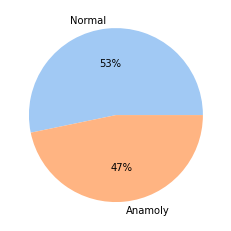

In [190]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(y_train.value_counts(), labels = ['Normal', 'Anamoly'],colors = colors, autopct='%.0f%%')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


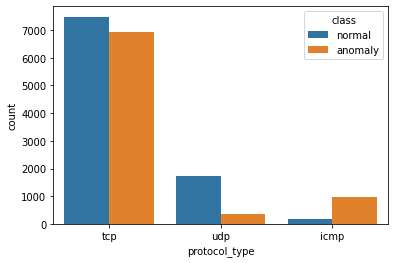

In [191]:
sns.countplot(x_train['protocol_type'], hue=y_train)

Almost 80% of the traffic belongs to 'tcp' and the rest to 'udp' and 'icmp'


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


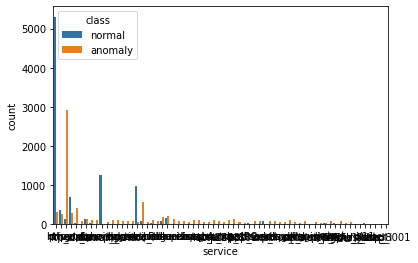

In [192]:
sns.countplot(x_train['service'], hue=y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


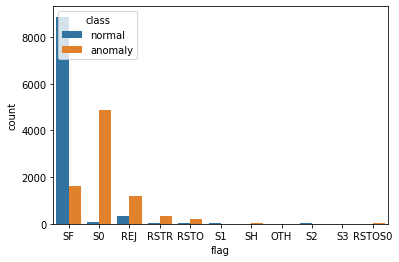

In [193]:
sns.countplot(x_train['flag'], hue=y_train)

* Majority of SF flagged traffic was normal 
* SO flagged traffic contributed the  majority of the anomalies



In [194]:
#ENCODING THE TARGET CLASS AS 1 IF ANOMALY ELSE 0
y_train = y_train.apply(lambda x: 1 if x=="anomaly" else 0)
y_test = y_test.apply(lambda x: 1 if x=="anomaly" else 0)

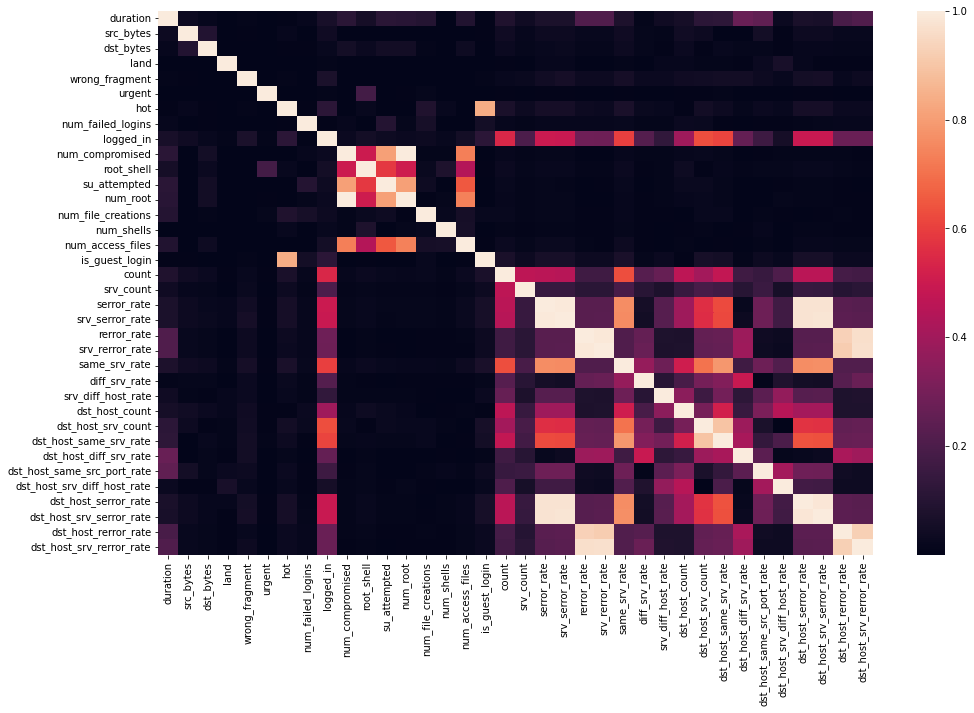

In [195]:
#PLOTTING A HEAT MAP TO SEE FOR CORRELATION
plt.figure(figsize=(16,10))
sns.heatmap(x_train.corr().apply(abs))

We see a uniform chart as we have dropped the features which aren't useful



In [196]:
#CORRELATION FOR EACH OF THE FEATURE WITH THE TARGET VARIABLE 
corr = x_train.corrwith(y_train).apply(abs)
corr

duration                       0.048451
src_bytes                      0.017021
dst_bytes                      0.019897
land                           0.000692
wrong_fragment                 0.096046
urgent                         0.008036
hot                            0.005791
num_failed_logins              0.004269
logged_in                      0.691067
num_compromised                0.021086
root_shell                     0.020333
su_attempted                   0.027956
num_root                       0.022053
num_file_creations             0.019288
num_shells                     0.009031
num_access_files               0.037638
is_guest_login                 0.030937
count                          0.579084
srv_count                      0.005442
serror_rate                    0.649810
srv_serror_rate                0.647435
rerror_rate                    0.262224
srv_rerror_rate                0.261998
same_srv_rate                  0.749762
diff_srv_rate                  0.196799


In [197]:
#CHECKING FOR FEATURES WHICH COULD HIGHLY CONTRIBUTE TO OUR ML MODEL
corr[corr>0.7]

same_srv_rate         0.749762
dst_host_srv_count    0.723439
dtype: float64



*   Low correlation for many features is a good sign here
*   Correlation can (sometimes) indicate the presence of a causal relationship
* Multicollinearity can lead to skewed or misleading results



In [ ]:
#ENCODING CATEGORICAL DATA